In [1]:
import numpy as np
import pandas as pd


In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000) # you may take top 10,000 word frequently review of movies
#consolidating data for EDA(exploratory data analysis: involves gathering all the relevant data into one place and preparing it for analysis )
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)


In [3]:
print("Review is ",X_train[5]) # series of no converted word to vocabulory associated with index
print("Review is ",y_train[5]) # 0 indicating a negative review and 1 indicating a positive review.


Review is  [1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
Review is  0


In [4]:
# vocab=imdb.get_word_index() #The code you provided retrieves the word index for the IMDB dataset
# print(vocab)

In [5]:
label #label is a numpy array that contains all the sentiment labels from the IMDB dataset, both the training and testing sets.0 indicates a negative review and 1 indicates a positive review.
X_train.shape

(25000,)

In [6]:
# X_train[0]

In [7]:
index = imdb.get_word_index()

In [8]:
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
reverse_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [9]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
decoded

"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
def vectorize(sequences, dimension = 10000):
  # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [11]:
data = vectorize(data)
label = np.array(label).astype("float32")

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.20, random_state=1)

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

In [14]:
model = models.Sequential()

In [15]:
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu")) #ReLU" stands for Rectified Linear Unit, and it is a commonly used activation function in neural networks. 
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid")) #adds another Dense layer to the model, but with a single neuron instead of 50,i.e. out put layer,it produces the output predictions of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [17]:
results = model.fit(
 X_train, y_train,
 epochs= 10,
 batch_size = 500,
 validation_data = (X_test, y_test),
)


Epoch 1/10
80/80 [==============================] - 6s 62ms/step - loss: 0.3989 - accuracy: 0.8232 - val_loss: 0.2575 - val_accuracy: 0.8971
Epoch 2/10
80/80 [==============================] - 2s 25ms/step - loss: 0.2132 - accuracy: 0.9189 - val_loss: 0.2604 - val_accuracy: 0.8963
Epoch 3/10
80/80 [==============================] - 2s 21ms/step - loss: 0.1510 - accuracy: 0.9461 - val_loss: 0.2869 - val_accuracy: 0.8947
Epoch 4/10
80/80 [==============================] - 2s 20ms/step - loss: 0.1040 - accuracy: 0.9643 - val_loss: 0.3312 - val_accuracy: 0.8920
Epoch 5/10
80/80 [==============================] - 2s 23ms/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.4117 - val_accuracy: 0.8856
Epoch 6/10
80/80 [==============================] - 2s 24ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 0.4516 - val_accuracy: 0.8868
Epoch 7/10
80/80 [==============================] - 2s 22ms/step - loss: 0.0411 - accuracy: 0.9851 - val_loss: 0.4868 - val_accuracy: 0.8834
Epoch 8/10
80

### plots

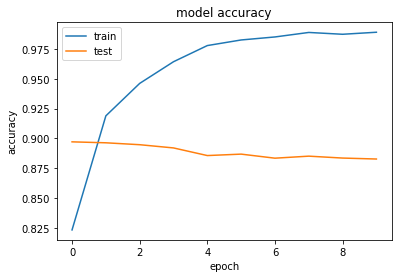

In [19]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(results.history['accuracy']) #Plots the training accuracy of the model at each epoch.
plt.plot(results.history['val_accuracy']) #Plots the validation accuracy of the model at each epoch.
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

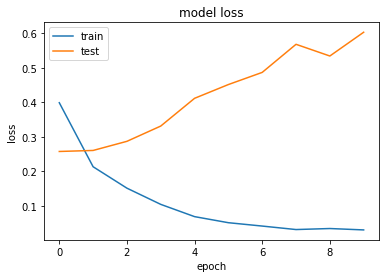

In [20]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([[0.3837373],
       [1.       ],
       [0.9919021],
       ...,
       [0.9993409],
       [1.       ],
       [1.       ]], dtype=float32)

In [28]:
y_predicted = []

In [29]:
for i in y_pred:
    if(i[0]>0.5):
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_predicted)
print(f"Accuracy: {acc}")

Accuracy: 0.8827
